In [51]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential, Model, load_model
from keras.layers import Dense, Dropout, Flatten, Input
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical, plot_model
from keras.callbacks import ModelCheckpoint
from keras import backend as K

import matplotlib.pyplot as plt
import numpy as np

In [31]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Label:  0
Label type:  <class 'numpy.uint8'>


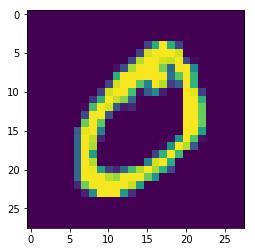

In [32]:
# Display example

sample = 1

print("Label: ", y_train[sample])
print("Label type: ", type(y_train[sample]))
plt.imshow(X_train[sample])
plt.show()

In [33]:
def preprocess_features(features):
    return features.reshape(features.shape[0], features.shape[1], features.shape[2], 1)

def preprocess_labels(labels):
    return to_categorical(labels, num_classes=10)

In [34]:
processed_training_features = preprocess_features(X_train)
print("Training Feature shape:", processed_training_features.shape)

processed_training_labels = preprocess_labels(y_train)
print("Training Label shape:", processed_training_labels.shape)

processed_testing_features = preprocess_features(X_test)
print("Testing Feature shape:", processed_testing_features.shape)

processed_testing_labels = preprocess_labels(y_test)
print("Testing Label shape:", processed_testing_labels.shape)

Training Feature shape: (60000, 28, 28, 1)
Training Label shape: (60000, 10)
Testing Feature shape: (10000, 28, 28, 1)
Testing Label shape: (10000, 10)


In [43]:
def mlp():
    model = Sequential()
    model.add(Dense(32, activation='relu', input_shape=(28,28, 1)))
    model.add(Dropout(0.25))
    model.add(Dense(16, activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(8, activation='relu'))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(10, activation='softmax'))
    model.summary()
    
    return model
    
def cnn():
    inputs = Input(shape=(28,28, 1))
    x = Conv2D(32, kernel_size=(3, 3), activation='relu')(inputs)
    x = Conv2D(64, kernel_size=(3, 3), activation='relu')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Dropout(0.25)(x)
    x = Flatten()(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.5)(x)
    predictions = Dense(10, activation='softmax')(x)
    
    model = Model(inputs=inputs, output=predictions)
    model.summary()
    
    return model

In [36]:
# Setup
features = processed_training_features
targets  = processed_training_labels
model    = mlp()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_34 (Dense)             (None, 28, 28, 32)        64        
_________________________________________________________________
dropout_27 (Dropout)         (None, 28, 28, 32)        0         
_________________________________________________________________
dense_35 (Dense)             (None, 28, 28, 16)        528       
_________________________________________________________________
dropout_28 (Dropout)         (None, 28, 28, 16)        0         
_________________________________________________________________
dense_36 (Dense)             (None, 28, 28, 8)         136       
_________________________________________________________________
dropout_29 (Dropout)         (None, 28, 28, 8)         0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 6272)              0         
__________

In [37]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(features, targets,
          batch_size=128,
          epochs=5,
          verbose=1,
          validation_data=(processed_testing_features, processed_testing_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 90s - loss: 1.3386 - acc: 0.7578 - val_loss: 0.2680 - val_acc: 0.9301
Epoch 2/5
60000/60000 [==============================] - 90s - loss: 0.3213 - acc: 0.9052 - val_loss: 0.2125 - val_acc: 0.9573
Epoch 3/5
60000/60000 [==============================] - 90s - loss: 0.2133 - acc: 0.9354 - val_loss: 0.1425 - val_acc: 0.9666
Epoch 4/5
60000/60000 [==============================] - 91s - loss: 0.1719 - acc: 0.9479 - val_loss: 0.1187 - val_acc: 0.9704
Epoch 5/5
60000/60000 [==============================] - 92s - loss: 0.1449 - acc: 0.9563 - val_loss: 0.1008 - val_acc: 0.9746


In [41]:
score = model.evaluate(processed_testing_features, processed_testing_labels, verbose=0)
print('Multilayer Perceptron')
print('Test loss:', score[0])
print('Test accuracy: {0:.2f}'.format(score[1]*100))

Multilayer Perceptron
Test loss: 0.100844037634
Test accuracy: 97.46


Labels: 	[5, 0, 4, 1, 9]
Predictions: 	[5, 0, 4, 1, 9]


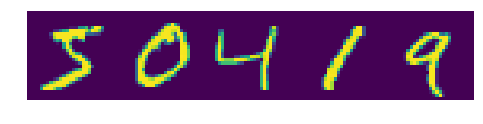

In [42]:
%matplotlib inline

sample_count = 5
predictions  = model.predict(features[:sample_count])
print("Labels: \t{}".format([np.argmax(i) for i in targets[:sample_count]]))
print("Predictions: \t{}".format([np.argmax(i) for i in predictions]))

fig     = plt.figure(figsize=(8, 8))
columns = 5
rows    = 1

for i in range(1, columns*rows+1):
    img = features[i-1]
    img = img.reshape(28, 28)
    fig.add_subplot(rows, columns, i)
    plt.imshow(img, aspect='equal')
    plt.axis('off')
    
plt.subplots_adjust(wspace=0, hspace=0)
plt.show()

In [44]:
# Convolutional Neural Network
features = processed_training_features
targets  = processed_training_labels
model    = cnn()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_31 (Dropout)         (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_39 (Dense)             (None, 128)               1179776   
__________

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:28: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=Tensor("de..., inputs=Tensor("in...)`


In [45]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

checkpointer = ModelCheckpoint(filepath='mnist_model.hdf5', 
                               verbose=1, save_best_only=True, monitor='acc',)

history = model.fit(features, targets,
          batch_size=128,
          epochs=15,
          verbose=1,
          callbacks=[checkpointer],
          validation_data=(processed_testing_features, processed_testing_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 165s - loss: 0.9502 - acc: 0.8422 - val_loss: 0.0874 - val_acc: 0.9733
Epoch 2/15
60000/60000 [==============================] - 165s - loss: 0.1522 - acc: 0.9566 - val_loss: 0.0643 - val_acc: 0.9810
Epoch 3/15
60000/60000 [==============================] - 165s - loss: 0.1054 - acc: 0.9698 - val_loss: 0.0477 - val_acc: 0.9847
Epoch 4/15
60000/60000 [==============================] - 165s - loss: 0.0795 - acc: 0.9773 - val_loss: 0.0445 - val_acc: 0.9872
Epoch 5/15
60000/60000 [==============================] - 165s - loss: 0.0679 - acc: 0.9806 - val_loss: 0.0405 - val_acc: 0.9879
Epoch 6/15
60000/60000 [==============================] - 164s - loss: 0.0574 - acc: 0.9827 - val_loss: 0.0356 - val_acc: 0.9891
Epoch 7/15
60000/60000 [==============================] - 165s - loss: 0.0507 - acc: 0.9855 - val_loss: 0.0397 - val_acc: 0.9880
Epoch 8/15
60000/60000 [=======================

In [46]:
score = model.evaluate(features, targets, verbose=0)
print('Convolutional Neural Network')
print('Test loss:', score[0])
print('Test accuracy: {0:.2f}'.format(score[1]*100))

Convolutional Neural Network
Test loss: 0.00951594145434
Test accuracy: 99.79


Labels: 	[5, 0, 4, 1, 9]
Predictions: 	[5, 0, 4, 1, 9]


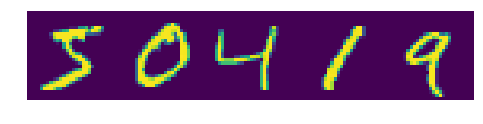

In [47]:
%matplotlib inline

sample_count = 5
predictions  = model.predict(features[:sample_count])
print("Labels: \t{}".format([np.argmax(i) for i in targets[:sample_count]]))
print("Predictions: \t{}".format([np.argmax(i) for i in predictions]))

fig     = plt.figure(figsize=(8, 8))
columns = 5
rows    = 1

for i in range(1, columns*rows+1):
    img = features[i-1]
    img = img.reshape(28, 28)
    fig.add_subplot(rows, columns, i)
    plt.imshow(img, aspect='equal')
    plt.axis('off')
    
plt.subplots_adjust(wspace=0, hspace=0)
plt.show()